## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
!pip install tensorflow
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 272.8/272.8 MB 3.5 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 1.5/1.5 MB 15.7 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached protob

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Data Analysis

In [5]:
intrusion=pd.read_csv('IoT Network Intrusion Dataset.csv')
intrusion.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [6]:
intrusion.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


In [7]:
intrusion.columns.tolist()

['Flow_ID',
 'Src_IP',
 'Src_Port',
 'Dst_IP',
 'Dst_Port',
 'Protocol',
 'Timestamp',
 'Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Down/Up_Ratio',
 'Pkt_Size_Avg',
 '

In [8]:
intrusion['Cat'].unique()

array(['Mirai', 'DoS', 'Scan', 'Normal', 'MITM ARP Spoofing'],
      dtype=object)

In [9]:
intrusion['Cat'].nunique()

5

In [12]:
intrusion_data=intrusion.drop(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Src_Port','Sub_Cat'], axis=1)

In [13]:
x = intrusion_data.columns.tolist()
y = intrusion_data.select_dtypes(include=np.number).columns.tolist()
list(set(x)-set(y))

['Label', 'Cat']

In [15]:
Cat_map = {
    'Normal' : 0,
    'Mirai' : 1,
    'DoS' : 2,
    'Scan' : 3,
    'MITM ARP Spoofing' : 4,
}

In [16]:
intrusion_cat = intrusion_data.drop(['Label'], axis=1)
cat_data = intrusion_cat['Cat'].map(Cat_map)
intrusion_cat['Cat'] = cat_data
print(intrusion_cat.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10101        17             75             1             1   
1       554         6           5310             1             2   
2      9020         6            141             0             3   
3      9020         6            151             0             2   
4      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0            982.0           1430.0            982.0            982.0   
1              0.0              0.0              0.0              0.0   
2              0.0           2806.0              0.0              0.0   
3              0.0           2776.0              0.0              0.0   
4            886.0            420.0            452.0            434.0   

   Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0             982.0  ...                 0          0.0         0.0   
1         

In [20]:
Label_map = {
    'Normal' : 0,
    'Anomaly' : 1
}

intrusion_label = intrusion_data.drop(['Cat'], axis=1)
label_data = intrusion_label['Label'].map(Label_map)
intrusion_label['Label'] = label_data
print(intrusion_label.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10101        17             75             1             1   
1       554         6           5310             1             2   
2      9020         6            141             0             3   
3      9020         6            151             0             2   
4      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0            982.0           1430.0            982.0            982.0   
1              0.0              0.0              0.0              0.0   
2              0.0           2806.0              0.0              0.0   
3              0.0           2776.0              0.0              0.0   
4            886.0            420.0            452.0            434.0   

   Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0             982.0  ...                 0          0.0         0.0   
1         

In [21]:
intrusion_cat.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1
1,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,2
2,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,3
3,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1
4,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,8043,17,277,1,1,18.0,18.0,18.0,18.0,18.0,...,0,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1
625779,554,6,1658,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,2
625780,9020,6,77,1,1,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,3
625781,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,...,0,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0


In [22]:
intrusion_label.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1
1,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1
2,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1
3,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1
4,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,8043,17,277,1,1,18.0,18.0,18.0,18.0,18.0,...,0,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1
625779,554,6,1658,0,2,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,1
625780,9020,6,77,1,1,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,1
625781,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,...,0,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0


In [23]:
X = intrusion_cat.drop(['Cat'], axis=1)
X.shape
y=intrusion_cat['Cat']
y.shape

(625783,)

In [24]:
print(X.columns.isnull().sum())

0


In [25]:
X = X.astype(float)
print(X.dtypes)

Dst_Port         float64
Protocol         float64
Flow_Duration    float64
Tot_Fwd_Pkts     float64
Tot_Bwd_Pkts     float64
                  ...   
Active_Min       float64
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Length: 78, dtype: object


In [26]:
np.where(X.values >= np.finfo(np.float64).max)

(array([  4532,   4532,   6605,   6605,   7463,   7463,   7962,   7962,
         12705,  12705,  16058,  16058,  17045,  17045,  22333,  22333,
         26127,  26127,  28813,  28813,  29211,  29211,  31675,  31675,
         32300,  32300,  33269,  33269,  33980,  33980,  36362,  36362,
         37646,  37646,  38756,  38756,  43787,  43787,  44066,  44066,
         44468,  44468,  44840,  44840,  46300,  46300,  47302,  47302,
         51387,  51387,  52841,  52841,  54344,  54344,  55902,  55902,
         56859,  56859,  58637,  58637,  61018,  61018,  61498,  61498,
         61653,  61653,  63240,  63240,  65059,  65059,  67289,  67289,
         67518,  67518,  69883,  69883,  70168,  70168,  71215,  71215,
         73611,  73611,  77077,  77077,  78190,  78190,  81953,  81953,
         82939,  82939,  84657,  84657,  84872,  84872,  85372,  85372,
         85729,  85729,  92021,  92021,  93122,  93122,  94610,  94610,
         96212,  96212,  99012,  99012, 103193, 103193, 104158, 

In [27]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

## Data Normalization

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [29]:
X.head()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,-0.690964,1.000000,-0.998500,-0.989247,-1.000000,-0.982120,-0.996301,0.341530,0.341530,0.341530,...,-0.989247,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998500,-1.000000,-0.998500,-0.998500
1,-0.983051,-0.294118,-0.893783,-0.989247,-0.996422,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.946886,-0.932570,-0.914897,-0.978874
2,-0.724037,-0.294118,-0.997180,-1.000000,-0.992844,-1.000000,-0.992743,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998590,-0.999979,-0.998580,-0.998600
3,-0.724037,-0.294118,-0.996980,-1.000000,-0.996422,-1.000000,-0.992820,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-0.996979,-1.000000,-0.996979,-0.996979
4,-0.941870,1.000000,-0.996940,-0.978495,-1.000000,-0.983868,-0.998914,-0.382514,-0.407104,-0.394809,...,-0.978495,-1.0,-1.0,-1.0,-1.0,-1.0,-0.998470,-0.999979,-0.998460,-0.998480


In [30]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [31]:
np.where(y.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [32]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [33]:
y[y==np.inf]=np.nan
y.fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9204\2679510254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==np.inf]=np.nan


### Splitting Data


In [34]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [35]:
y_train.head()

499990    1
317578    1
255711    1
389744    1
17527     1
Name: Cat, dtype: int64

### Features Extraction

In [26]:
# print(X_train.columns[rfecv.get_support()])

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Subflow_Fwd_Pkts'

In [51]:
# selected_features = X_train.columns[rfecv.get_support()]
# selected_features=selected_features.tolist()

In [52]:
n=64
feature_importance = _.estimator_.feature_importances_  # or coef_
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

top_64_features = X_train.columns[top_n_idx]
top_64_features = top_64_features.tolist()
top_64_features

['SYN_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Bwd_Blk_Rate_Avg',
 'Subflow_Fwd_Byts',
 'Pkt_Len_Std',
 'Subflow_Fwd_Pkts',
 'Bwd_Pkt_Len_Std',
 'Subflow_Bwd_Byts',
 'Down/Up_Ratio',
 'Bwd_IAT_Min',
 'Pkt_Len_Var',
 'Pkt_Len_Max',
 'Pkt_Len_Min',
 'RST_Flag_Cnt',
 'Protocol',
 'URG_Flag_Cnt',
 'Fwd_Pkt_Len_Max',
 'Bwd_Pkts/s',
 'TotLen_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'Fwd_URG_Flags',
 'Bwd_IAT_Std',
 'Bwd_Pkt_Len_Mean',
 'ACK_Flag_Cnt',
 'PSH_Flag_Cnt',
 'Fwd_Pkt_Len_Std',
 'Fwd_Pkt_Len_Min',
 'Fwd_Header_Len',
 'Bwd_IAT_Mean',
 'Bwd_Byts/b_Avg',
 'Fwd_Pkts/s',
 'Fwd_IAT_Std',
 'Flow_Byts/s',
 'Bwd_Header_Len',
 'Bwd_IAT_Max',
 'Fwd_Seg_Size_Avg',
 'Fwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Max',
 'Bwd_IAT_Tot',
 'Bwd_Pkt_Len_Min',
 'Fwd_IAT_Tot',
 'Fwd_Byts/b_Avg',
 'Fwd_IAT_Max',
 'FIN_Flag_Cnt',
 'Fwd_IAT_Mean',
 'Tot_Bwd_Pkts',
 'Fwd_IAT_Min',
 'Tot_Fwd_Pkts',
 'Flow_IAT_Min',
 'Flow_Pkts/s',
 'Fwd_PSH_Flags',
 'Bwd_Pkts/b_Avg',
 'Pkt_Size_Avg',
 'Flow_IAT_Std',
 'Bwd_URG_Flags',
 '

In [55]:
# features_removed=(set(X_train.columns)-set(top_64_features))
# features_removed

{'Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Flow_IAT_Max',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Mean'}

In [36]:
features_to_be_dropped=['Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Flow_IAT_Max',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Mean']

In [37]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [47]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

from keras.models import load_model, Model

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn1 = load_model('CNN1D.h5')
cnn1.layers.pop()
cnn1.layers.pop()

cnn1.add(Dense(512, activation='relu', name="dense_a"))
cnn1.add(Dense(units=5, activation='sigmoid', name="dense_b"))

for layer in cnn1.layers[:-2]:
    layer.trainable = False

cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = cnn1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

Epoch 1/10
11734/11734 [==============================] - 319s 27ms/step - loss: 0.8255 - accuracy: 0.7066 - val_loss: 0.6740 - val_accuracy: 0.7591
Epoch 2/10
11734/11734 [==============================] - 319s 27ms/step - loss: 0.6916 - accuracy: 0.7420 - val_loss: 0.6173 - val_accuracy: 0.7673
Epoch 3/10
11734/11734 [==============================] - 317s 27ms/step - loss: 0.6533 - accuracy: 0.7511 - val_loss: 0.5885 - val_accuracy: 0.7669
Epoch 4/10
11734/11734 [==============================] - 314s 27ms/step - loss: 0.6289 - accuracy: 0.7555 - val_loss: 0.5678 - val_accuracy: 0.7673
Epoch 5/10
11734/11734 [==============================] - 313s 27ms/step - loss: 0.6121 - accuracy: 0.7586 - val_loss: 0.5534 - val_accuracy: 0.7673
Epoch 6/10
11734/11734 [==============================] - 312s 27ms/step - loss: 0.5989 - accuracy: 0.7615 - val_loss: 0.5429 - val_accuracy: 0.7716
Epoch 7/10
11734/11734 [==============================] - 313s 27ms/step - loss: 0.5899 - accuracy: 0.7649

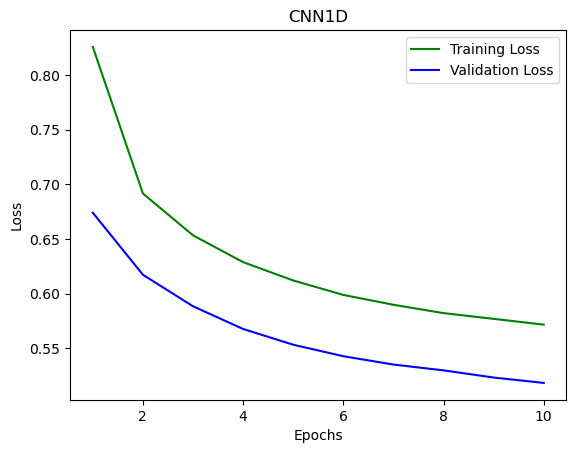

In [48]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

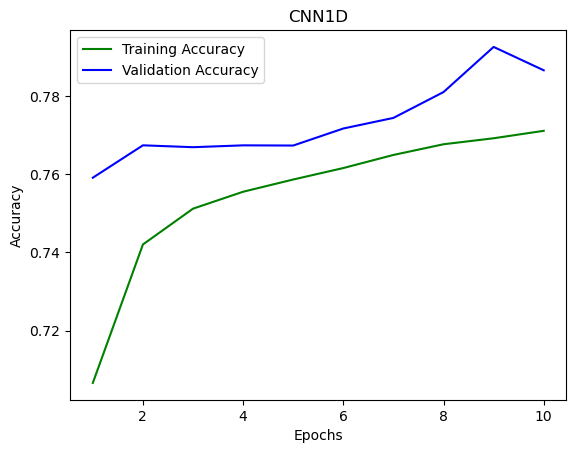

In [49]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
y_pred = cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

3912/3912 [==============================] - 34s 9ms/step


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 78.58

Precision: 77.76
Recall: 78.58
F1-score: 75.27



In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

In [53]:
np.unique(y_test)

array([0, 1, 2, 3, 4], dtype=int64)

In [54]:
np.unique(y_pred_classes)

array([0, 1, 2, 3, 4], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','Mirai','DoS','Scan','MITM ARP Spoofing'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.79      0.41      0.54      8015
            Mirai       0.79      0.94      0.86     83136
              DoS       1.00      0.94      0.97     11878
             Scan       0.50      0.32      0.39     15053
MITM ARP Spoofing       0.86      0.08      0.15      7075

         accuracy                           0.79    125157
        macro avg       0.79      0.54      0.58    125157
     weighted avg       0.78      0.79      0.75    125157



In [56]:
num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Mirai','DoS','Scan','MITM ARP Spoofing']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.955144,3296.0,116247.0,895.0,4719.0
1,Mirai,0.795529,78545.0,21021.0,21000.0,4591.0
2,DoS,0.994183,11155.0,113274.0,5.0,723.0
3,Scan,0.879312,4764.0,105288.0,4816.0,10289.0
4,MITM ARP Spoofing,0.947346,583.0,117984.0,98.0,6492.0


In [57]:
X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)

X_val = X_val.reshape(X_val.shape[0],  8, 8, 1)

X_test = X_test.reshape(X_test.shape[0],  8, 8, 1)

cnn2 = load_model('CNN2D.h5')
cnn2.layers.pop()
cnn2.layers.pop()

cnn2.add(Dense(512, activation='relu', name='dense_a'))
cnn2.add(Dense(units=5, activation='sigmoid', name='dense_b'))

for layer in cnn2.layers[:-2]:
    layer.trainable = False

cnn2.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = cnn2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=2)], verbose=1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

Epoch 1/10
11734/11734 [==============================] - 162s 14ms/step - loss: 0.7528 - accuracy: 0.7474 - val_loss: 0.6855 - val_accuracy: 0.7608
Epoch 2/10
11734/11734 [==============================] - 184s 16ms/step - loss: 0.7018 - accuracy: 0.7566 - val_loss: 0.6749 - val_accuracy: 0.7660
Epoch 3/10
11734/11734 [==============================] - 182s 16ms/step - loss: 0.6930 - accuracy: 0.7586 - val_loss: 0.6696 - val_accuracy: 0.7659
Epoch 4/10
11734/11734 [==============================] - 178s 15ms/step - loss: 0.6866 - accuracy: 0.7602 - val_loss: 0.6642 - val_accuracy: 0.7694
Epoch 5/10
11734/11734 [==============================] - 177s 15ms/step - loss: 0.6818 - accuracy: 0.7609 - val_loss: 0.6594 - val_accuracy: 0.7684
Epoch 6/10
11734/11734 [==============================] - 176s 15ms/step - loss: 0.6780 - accuracy: 0.7622 - val_loss: 0.6547 - val_accuracy: 0.7695
Epoch 7/10
11734/11734 [==============================] - 178s 15ms/step - loss: 0.6755 - accuracy: 0.7623

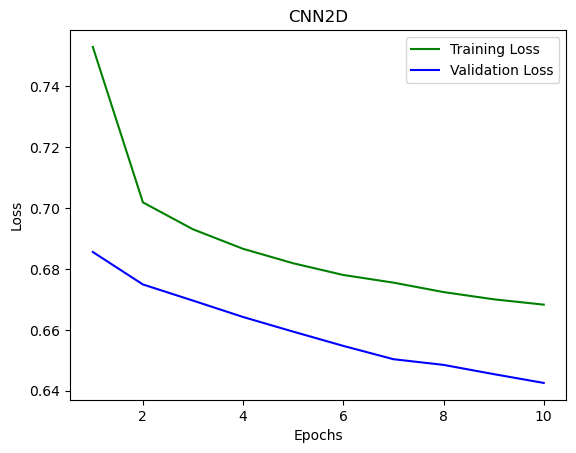

In [58]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

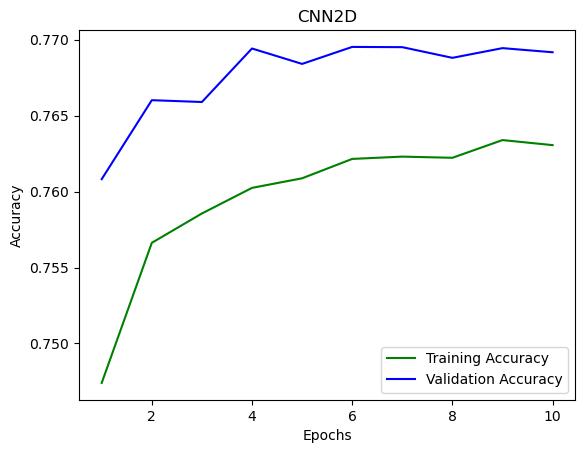

In [59]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
y_pred = cnn2.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

3912/3912 [==============================] - 23s 6ms/step


In [62]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 76.79

Precision: 70.15
Recall: 76.79
F1-score: 71.54



In [63]:
np.unique(y_test)

array([0, 1, 2, 3, 4], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','Mirai','DoS','Scan','MITM ARP Spoofing'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.02      0.00      0.00      8015
            Mirai       0.77      0.95      0.85     83136
              DoS       0.99      0.99      0.99     11878
             Scan       0.47      0.27      0.34     15053
MITM ARP Spoofing       0.69      0.17      0.28      7075

         accuracy                           0.77    125157
        macro avg       0.59      0.48      0.49    125157
     weighted avg       0.70      0.77      0.72    125157



In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Mirai','DoS','Scan','MITM ARP Spoofing']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.935585,1.0,117094.0,48.0,8014.0
1,Mirai,0.777647,79170.0,18158.0,23863.0,3966.0
2,DoS,0.998098,11712.0,113207.0,72.0,166.0
3,Scan,0.875772,4008.0,105601.0,4503.0,11045.0
4,MITM ARP Spoofing,0.948776,1222.0,117524.0,558.0,5853.0


### Binary Classification

In [75]:
X = intrusion_label.drop(['Label'], axis=1)
X.shape
y=intrusion_label['Label']
y.shape

(625783,)

In [76]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [77]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [78]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [79]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [80]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

In [81]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [82]:
from keras.models import load_model, Model

bi_cnn1 = load_model('CNN1D.h5')
bi_cnn1.layers.pop()
bi_cnn1.layers.pop()

bi_cnn1.add(Dense(256, activation='relu', name='dense_a'))
bi_cnn1.add(Dense(units=2, activation='softmax', name='dense_b'))

for layer in bi_cnn1.layers[:-2]:
    layer.trainable = False

bi_cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = bi_cnn1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

Epoch 1/10
11734/11734 [==============================] - 220s 19ms/step - loss: 0.2174 - accuracy: 0.9374 - val_loss: 0.1927 - val_accuracy: 0.9462
Epoch 2/10
11734/11734 [==============================] - 221s 19ms/step - loss: 0.1953 - accuracy: 0.9395 - val_loss: 0.1819 - val_accuracy: 0.9457
Epoch 3/10
11734/11734 [==============================] - 214s 18ms/step - loss: 0.1876 - accuracy: 0.9402 - val_loss: 0.1722 - val_accuracy: 0.9457
Epoch 4/10
11734/11734 [==============================] - 214s 18ms/step - loss: 0.1816 - accuracy: 0.9410 - val_loss: 0.1648 - val_accuracy: 0.9461
Epoch 5/10
11734/11734 [==============================] - 214s 18ms/step - loss: 0.1770 - accuracy: 0.9408 - val_loss: 0.1588 - val_accuracy: 0.9458
Epoch 6/10
11734/11734 [==============================] - 214s 18ms/step - loss: 0.1742 - accuracy: 0.9404 - val_loss: 0.1556 - val_accuracy: 0.9458
Epoch 7/10
11734/11734 [==============================] - 213s 18ms/step - loss: 0.1709 - accuracy: 0.9409

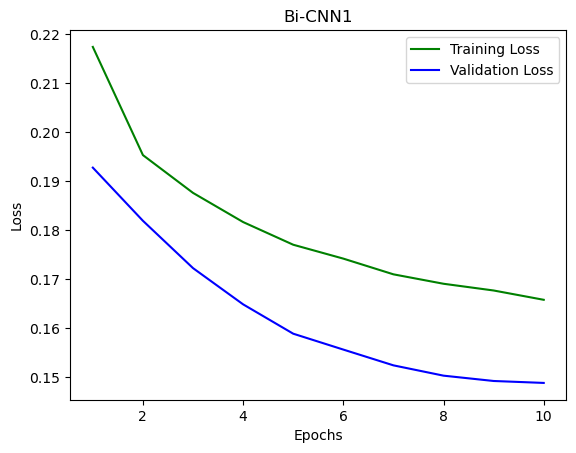

In [83]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

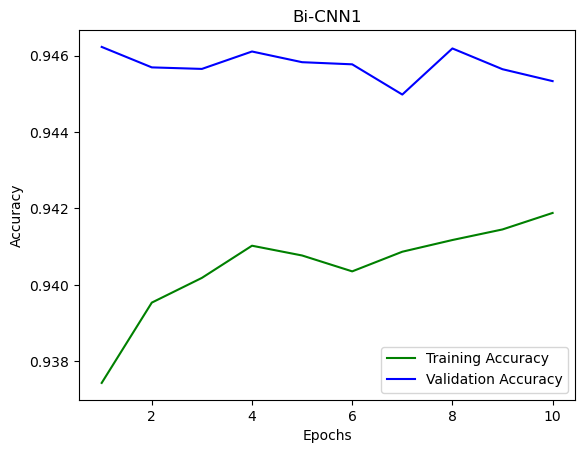

In [84]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
y_pred = bi_cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

3912/3912 [==============================] - 42s 11ms/step

Testing Accuracy: 94.55

Precision: 93.60
Recall: 94.55
F1-score: 93.21



In [86]:
report = classification_report(y_test, y_pred_classes, target_names=['Normal','Anamoly'])

print(report)

              precision    recall  f1-score   support

      Normal       0.73      0.23      0.36      8015
     Anamoly       0.95      0.99      0.97    117142

    accuracy                           0.95    125157
   macro avg       0.84      0.61      0.66    125157
weighted avg       0.94      0.95      0.93    125157



In [87]:
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Anomaly']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.9455,1878.0,116458.0,684.0,6137.0
1,Anomaly,0.9455,116458.0,1878.0,6137.0,684.0


In [88]:
X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)

X_val = X_val.reshape(X_val.shape[0],  8, 8, 1)

X_test = X_test.reshape(X_test.shape[0],  8, 8, 1)

In [89]:
bi_cnn2 = load_model('CNN2D.h5')
bi_cnn2.layers.pop()
bi_cnn2.layers.pop()

bi_cnn2.add(Dense(256, activation='relu', name='dense_a'))
bi_cnn2.add(Dense(units=2, activation='softmax', name='dense_b'))

for layer in bi_cnn2.layers[:-2]:
    layer.trainable = False

bi_cnn2.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = bi_cnn2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=2)], verbose=1)

Epoch 1/10
11734/11734 [==============================] - 175s 15ms/step - loss: 0.2198 - accuracy: 0.9359 - val_loss: 0.2084 - val_accuracy: 0.9360
Epoch 2/10
11734/11734 [==============================] - 166s 14ms/step - loss: 0.2081 - accuracy: 0.9360 - val_loss: 0.2075 - val_accuracy: 0.9360
Epoch 3/10
11734/11734 [==============================] - 163s 14ms/step - loss: 0.2061 - accuracy: 0.9359 - val_loss: 0.2069 - val_accuracy: 0.9360
Epoch 4/10
11734/11734 [==============================] - 165s 14ms/step - loss: 0.2051 - accuracy: 0.9360 - val_loss: 0.2060 - val_accuracy: 0.9359
Epoch 5/10
11734/11734 [==============================] - 165s 14ms/step - loss: 0.2035 - accuracy: 0.9360 - val_loss: 0.2052 - val_accuracy: 0.9359
Epoch 6/10
11734/11734 [==============================] - 165s 14ms/step - loss: 0.2024 - accuracy: 0.9361 - val_loss: 0.2043 - val_accuracy: 0.9359
Epoch 7/10
11734/11734 [==============================] - 165s 14ms/step - loss: 0.2012 - accuracy: 0.9362

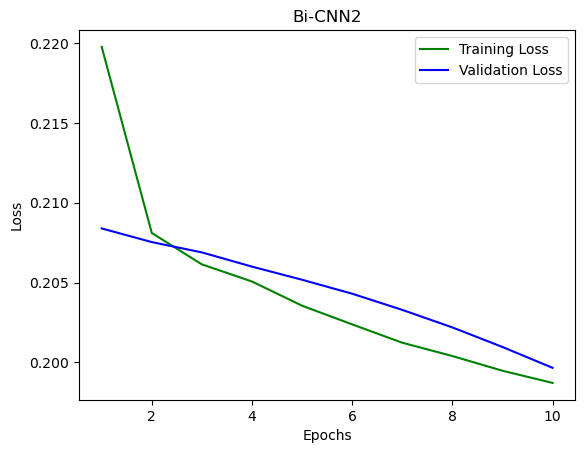

In [90]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Bi-CNN2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

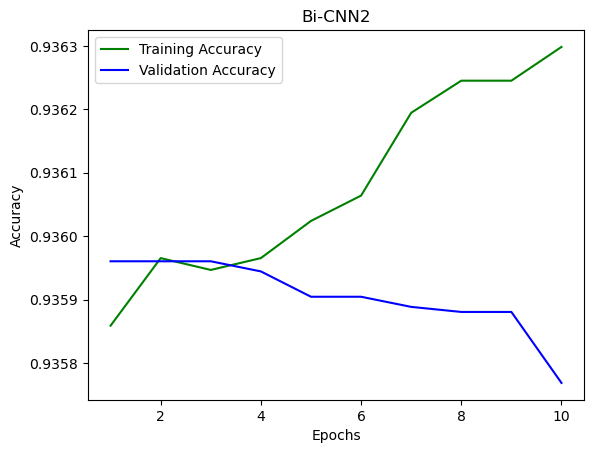

In [91]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Bi-CNN2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
y_pred = bi_cnn2.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

3912/3912 [==============================] - 36s 9ms/step

Testing Accuracy: 93.57

Precision: 87.60
Recall: 93.57
F1-score: 90.49



In [93]:
report = classification_report(y_test, y_pred_classes, target_names=['Normal','Anamoly'])

print(report)

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00      8015
     Anamoly       0.94      1.00      0.97    117142

    accuracy                           0.94    125157
   macro avg       0.47      0.50      0.48    125157
weighted avg       0.88      0.94      0.90    125157



In [94]:
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Anomaly']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.935665,0.0,117105.0,37.0,8015.0
1,Anomaly,0.935665,117105.0,0.0,8015.0,37.0
